In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
file_path = r"https://raw.githubusercontent.com/ajayt0m/Text_Classification_Alleppey/main/WScraped.csv"

df = pd.read_csv(file_path, encoding='latin1')

In [3]:
print(df.shape)

(100, 4)


In [4]:
df.Review[41]

'I am very happy write a review about Alleppey Or Aplappuzha because am a native of Alappuzha by birth, Even I have visited many other tourist location in many parts of India, Still I will give the first prize only to Alleppey, Anyway lets me share my information\'s and details about my native place, Its very difficult to shorten the infos about a beautifull place like alappuzha. Here we Go.\n\nAlappuzha(Alleppey):\n\nAlappey is in betwwen the board of Arabian Sea and a group of rivers flowing to Alleppey. Alappuzha is also known as "Venice Of the East", This name was given by Lord Curson(Viceroy of indian Empire) while he visited Alleppey. Ok! Let me share some of the beutifull insights of Alappuzha.\n\nAlleppey the the most and No.1 preferred Tourist location in Kerala, even in India, Alleppey is fully bounded with a large network of Canals. Alleppy is the very popular in the name of BackWater Tourism, This is a place completely surrounded with water.\n\nAlappuzha is very well known 

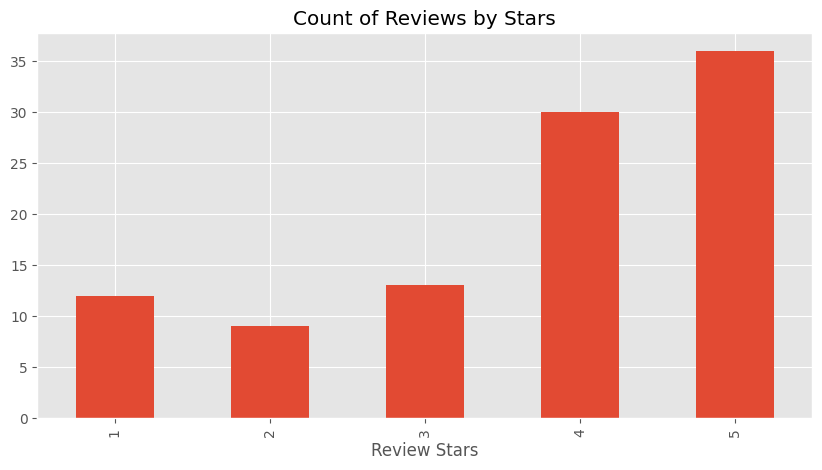

In [5]:
ax = df['Label'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [6]:
example = df['Review'][50]
print(example)

Hi I recently traveled with Elite houseboats and was very much happy with there service and boats, the houseboat was well maintained, the crue was very friendly and made sure we where comfortable, this was my first experience in a houseboat and I saw lots of houseboat there but the one which I travelled was far better than many others. the backwaters of Alleppey is truly one of the best way to enjoy the holidays. wonderful moments . great time to cherish for long time. you can find them at https://elitehouseboat.com


In [7]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Hi',
 'I',
 'recently',
 'traveled',
 'with',
 'Elite',
 'houseboats',
 'and',
 'was',
 'very']

In [8]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Hi', 'NNP'),
 ('I', 'PRP'),
 ('recently', 'RB'),
 ('traveled', 'VBD'),
 ('with', 'IN'),
 ('Elite', 'NNP'),
 ('houseboats', 'NNS'),
 ('and', 'CC'),
 ('was', 'VBD'),
 ('very', 'RB')]

# Step 1. VADER Seniment Scoring

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [10]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [11]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [12]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.9929}

In [13]:
example

'Hi I recently traveled with Elite houseboats and was very much happy with there service and boats, the houseboat was well maintained, the crue was very friendly and made sure we where comfortable, this was my first experience in a houseboat and I saw lots of houseboat there but the one which I travelled was far better than many others. the backwaters of Alleppey is truly one of the best way to enjoy the holidays. wonderful moments . great time to cherish for long time. you can find them at https://elitehouseboat.com'

In [14]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/100 [00:00<?, ?it/s]

In [15]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [16]:
vaders

,Id,neg,neu,pos,compound,Title,Review,Label
0,1,0.102,0.782,0.116,0.1615,Most overrated destination in kerala,I had a high expectations seeing this place in...,2
1,2,0.000,0.840,0.160,0.9766,Venice of the East,Popularly known as'Venice of the East' Alleppe...,3
2,3,0.169,0.784,0.047,-0.9392,Alleppey is most polluted city,"Hai friends, today I am telling you my bad exp...",1
3,4,0.000,0.750,0.250,0.9493,Alleppey,Alleppey is one the best place to visit in Ker...,4
4,5,0.092,0.786,0.123,0.8287,ABOUT EXPENSIVE ALLEPPEY TRIP,Alleppey one of the famous district in kerala....,1
...,...,...,...,...,...,...,...,...
95,96,0.029,0.693,0.278,0.9587,NaN,Beach was good and clean. We went early in the...,5
96,97,0.190,0.737,0.073,-0.6904,NaN,"Badly kept beach, authorities have no concern ...",1
97,98,0.000,0.647,0.353,0.9735,NaN,"Nice beach, best to visit early morning. Most ...",3
98,99,0.000,0.754,0.246,0.9806,NaN,Alappuzha Beach is known for its picturesque b...,4


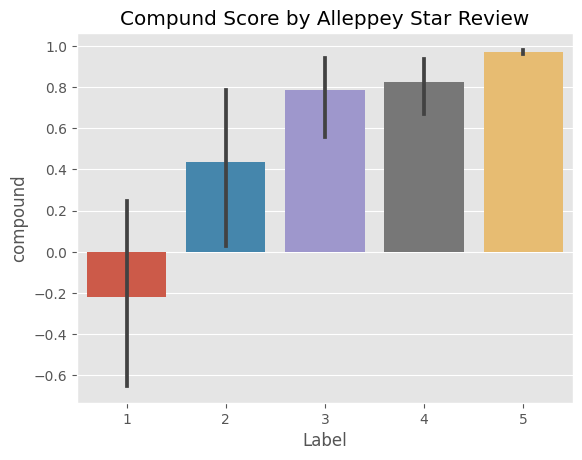

In [17]:
ax = sns.barplot(data=vaders, x='Label', y='compound')
ax.set_title('Compund Score by Alleppey Star Review')
plt.show()

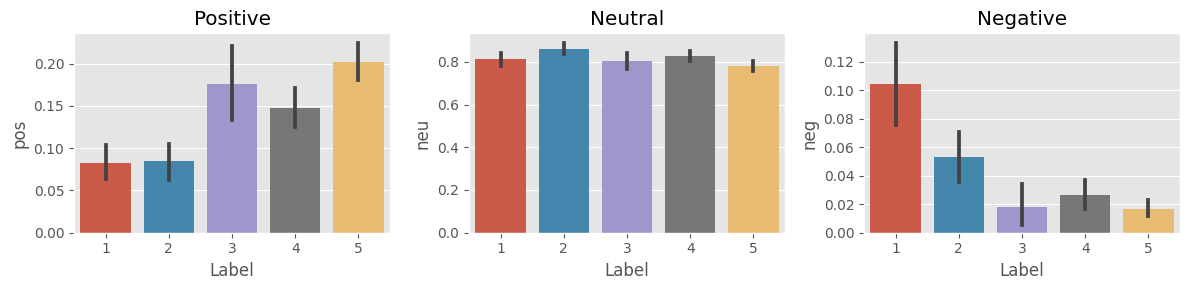

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Label', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Label', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Label', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 3. Roberta Pretrained Model

In [17]:
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification
from scipy.special import softmax

In [18]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [19]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Hi I recently traveled with Elite houseboats and was very much happy with there service and boats, the houseboat was well maintained, the crue was very friendly and made sure we where comfortable, this was my first experience in a houseboat and I saw lots of houseboat there but the one which I travelled was far better than many others. the backwaters of Alleppey is truly one of the best way to enjoy the holidays. wonderful moments . great time to cherish for long time. you can find them at https://elitehouseboat.com


{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.9929}

In [20]:
import tensorflow as tf
# Run for Roberta Model
# Tokenize and run through the model
encoded_text = tokenizer(example, return_tensors='tf')
output = model(**encoded_text)

# Convert TensorFlow tensor to NumPy array and apply softmax
scores = tf.nn.softmax(output.logits[0]).numpy()

# Create a dictionary with the scores
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}

# Print the scores
print(scores_dict)

{'roberta_neg': 0.0012992525, 'roberta_neu': 0.0069043464, 'roberta_pos': 0.9917964}


In [42]:
def polarity_scores_roberta_tf(example):
    # Tokenize and run through the model
    encoded_text = tokenizer(example, return_tensors='tf')
    output = model(**encoded_text)

    # Convert TensorFlow tensor to NumPy array and apply softmax
    scores = tf.nn.softmax(output.logits[0]).numpy()

    # Create a dictionary with the scores
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

    return scores_dict

In [54]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta_tf(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/100 [00:00<?, ?it/s]

In [53]:
def polarity_scores_roberta_tf(example, max_sequence_length=512):
    # Tokenize and run through the model
    encoded_text = tokenizer(example, return_tensors='tf', truncation=True, max_length=max_sequence_length)
    output = model(**encoded_text)

    # Convert TensorFlow tensor to NumPy array and apply softmax
    scores = tf.nn.softmax(output.logits[0]).numpy()

    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict


In [55]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [61]:
results_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Title,Review,Label
0,1,0.102,0.782,0.116,0.1615,0.937769,0.055992,0.006238,Most overrated destination in kerala,I had a high expectations seeing this place in...,2
1,2,0.000,0.840,0.160,0.9766,0.002097,0.076578,0.921325,Venice of the East,Popularly known as'Venice of the East' Alleppe...,3
2,3,0.169,0.784,0.047,-0.9392,0.870711,0.114793,0.014496,Alleppey is most polluted city,"Hai friends, today I am telling you my bad exp...",1
3,4,0.000,0.750,0.250,0.9493,0.002072,0.025199,0.972729,Alleppey,Alleppey is one the best place to visit in Ker...,4
4,5,0.092,0.786,0.123,0.8287,0.427089,0.406592,0.166319,ABOUT EXPENSIVE ALLEPPEY TRIP,Alleppey one of the famous district in kerala....,1
...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.029,0.693,0.278,0.9587,0.002019,0.017895,0.980086,NaN,Beach was good and clean. We went early in the...,5
96,97,0.190,0.737,0.073,-0.6904,0.643856,0.308694,0.047449,NaN,"Badly kept beach, authorities have no concern ...",1
97,98,0.000,0.647,0.353,0.9735,0.005405,0.059692,0.934903,NaN,"Nice beach, best to visit early morning. Most ...",3
98,99,0.000,0.754,0.246,0.9806,0.001431,0.082995,0.915574,NaN,Alappuzha Beach is known for its picturesque b...,4


d:\Softwares\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Softwares\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Softwares\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Softwares\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

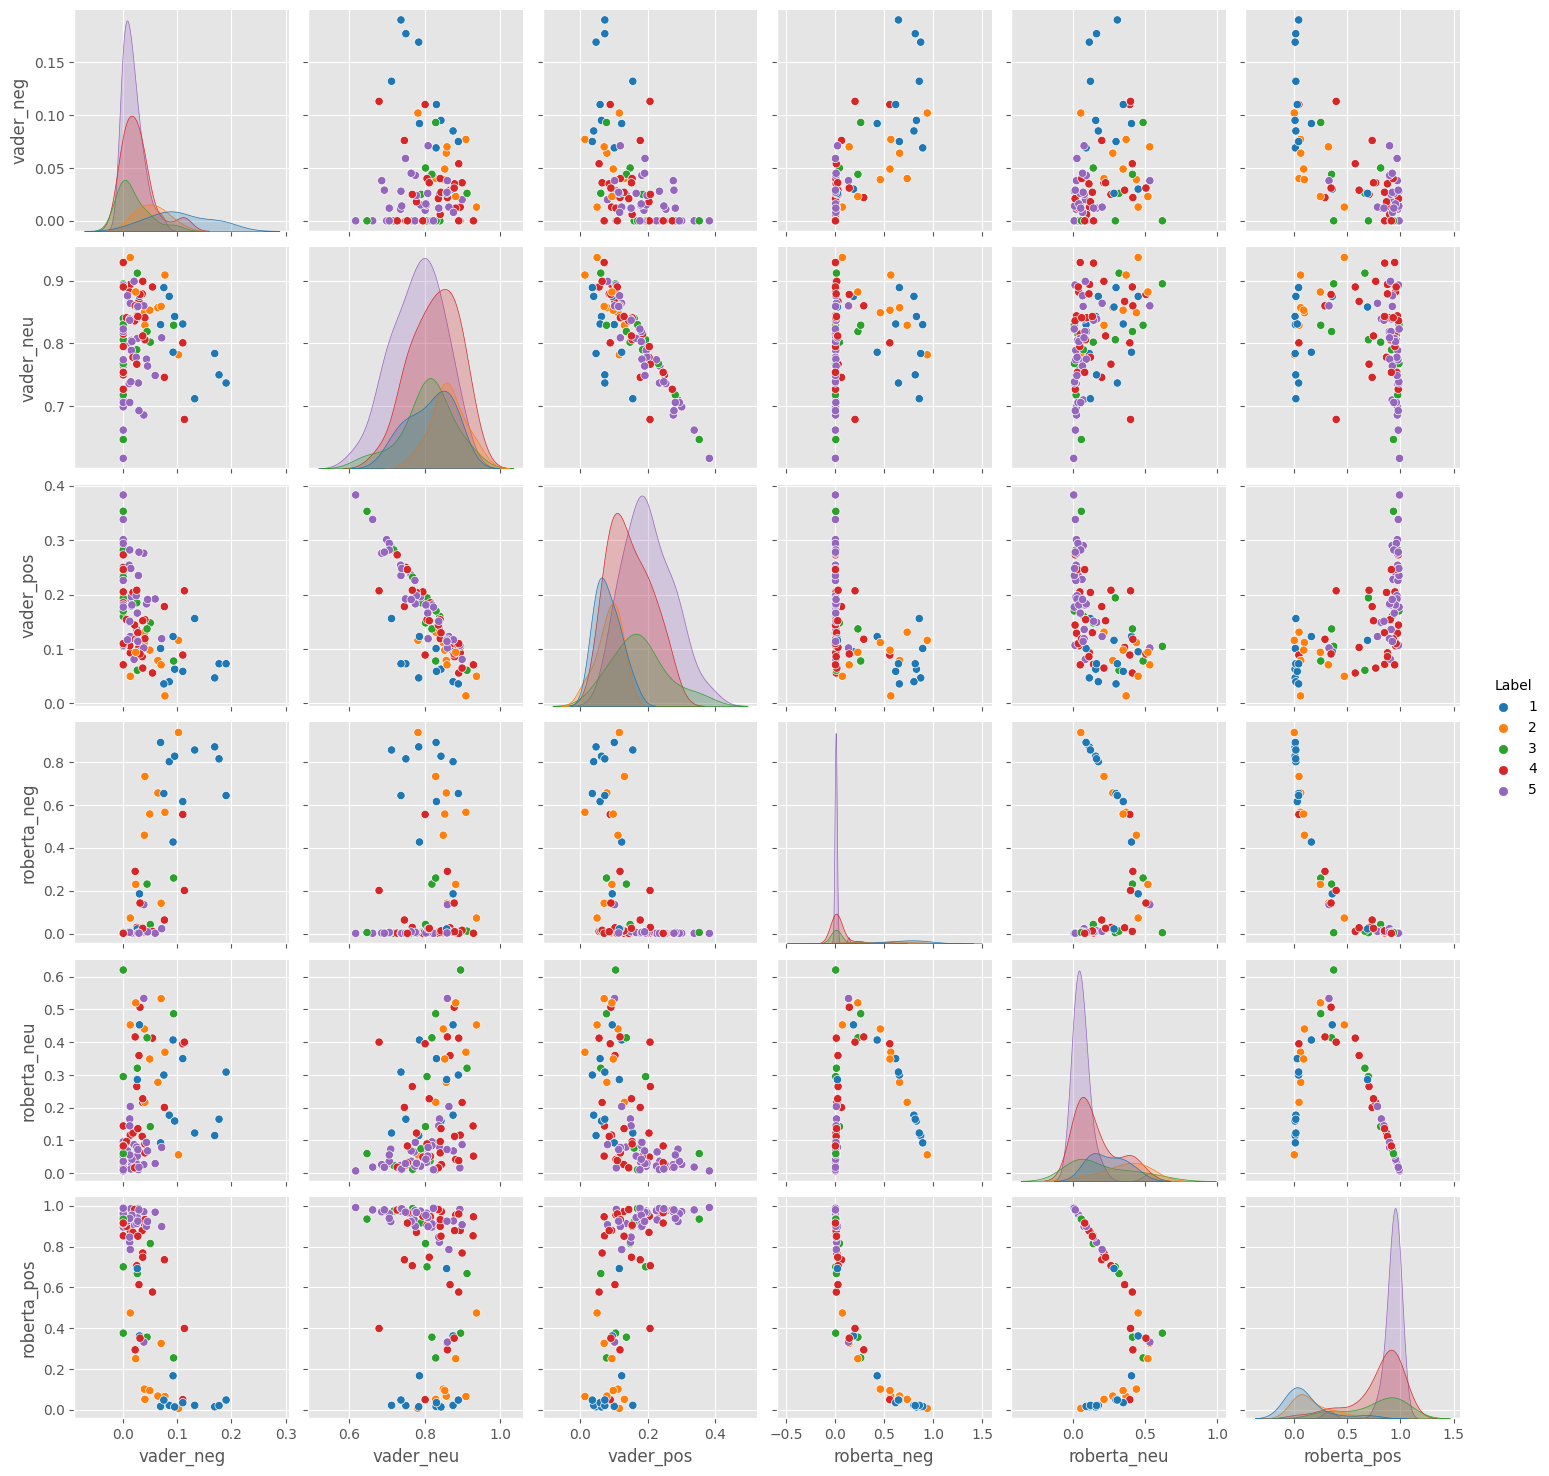

In [58]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Label',
            palette='tab10')
plt.show()

In [60]:
results_df.query('Label == 1') \
    .sort_values('roberta_pos', ascending=False)['Review'].values[0]

"This is specifically for the Over night house boat ride in an around Alleppey. I wish all will read the review before planning any trip for Kerela.\n\nI planned a 6 day long vacation including travel (by train) for kerela. This included 3 days in Munnar and 1 day in the house boat at alleppey.\n\nMunnar is really a wonderful place with nice weather, nice people and an ambience of a true hill station, not to forget the lush green mountains all along with every bit of them covered with tea plants. You can read other reviews about Munnar and find out it\x92s really a place worth visiting.\n\nWell, after staying in such a beautiful place for 3 days I started for Alleppey. We were 6 people (3 couples) and booked a 3 bedroom house boat for Rs. 12000/- for us. Indeed an amount of 4000 (per night, per couple) made us to carefully think over this option initially, but we spoke with our tour operator (Cozy Tours) and they convinced us about the facilities in the boat. And the feeling of traveli

In [62]:
results_df.query('Label == 1') \
    .sort_values('vader_pos', ascending=False)['Review'].values[0]

'I booked a house boat from https://alleppeyhouseboat.org and paid rs12000 for a night stay.I expected a beautiful and neat boat but once I landed there what I got was a shabby and low class house boat which had mosquitoes, was not clean and was very small too.\n\nThese cheats were interested in only taking the money and not bothered about the service and maintenance of the boats as seen in their photos in the site.Beware dont get cheated like me.'

In [63]:
results_df.query('Label == 5') \
    .sort_values('roberta_neg', ascending=False)['Review'].values[0]

"You got to hand it to 'em, ''God's Own Country'', has rather a romantic ring to it, no? Having grown up with a gaggle of Malayali friends in Itanagar, Kerala, where these guys disappeared into at least once every couple of years, was always a place that was intriguing. This guys always brought back with them stories of Onam, snake-boats, coconut tree and banana chips. Well, to cut this nostalgic trip short, I have always wanted to visit Kerala.\n\nOpportunity presented itself in form of a missus-on-warpath, who hadn't been taken on a vacation for years. Between the missus's persistent demand of Paris and my limited imagination that ventured no further then Nandi Hills, Kerala was a God-sent brain-wave.\n\nGetting There\n\nThe weekend before Diwali saw us on Kanyakumari express. I can't sleep when people snore and people invariable make it a point to do so when they are on the same compartment as me on a train. Regardless of whether it is Karma or a CIA conspiracy, I was still up in th

In [65]:
results_df.query('Label == 5') \
    .sort_values('vader_neg', ascending=False)['Review'].values[0]

"Hi,\n\nI just got from Alleppey Beach Resorts...i just love this place since its a superb getaway from city life...the resort is just about 30 mts from the shore line and the beach sand is within the compund itself..just like having the beach at you door step..literally!\n\nMy booking was initially for 3 days..but due to the wonderful ambience it provided ,i extended the stay for another 2 days.\n\nThe beach is just great..i just dont know what some people mean by saying the beach was ''not private'' ...there was a great deal of privacy...my self and my wife had no problem with any local men ''staring'' at us in a ''very threatening'' manner.and what do some people expect to find at a beach other than fishermen...high rise apartments or perhaps factories that dump a lot waste into it??!!! looks like toxic waste is no problem to them!\n\n..the beach was clean too..compared to the public section of the beach about 200 mts away..which was full of people and hawkers..\n\nthe food is just 